PROJECT 1

Team Info
Our team members are as follows:

**Simon Ustoyev

**Jack Russo

**Elina Azrilyan

**Anil Akyildirim


We will use one of the datasets located here:https://toreopsahl.com/datasets/#Cross_Parker

This intra-organizational network contains data about a research team in a manufacturing company (77 employees). In addition to the relational data, the dataset also contains information about the people (nodal attributes).

This network is based on the employees’ perception of each others’ knowledge and skills (“I understand this person’s knowledge and skills. This does not necessarily mean that I have these skills or am knowledgeable in these domains but that I understand what skills this person has and domains they are knowledgeable in”). The weight scale in this network is: 0: I Do Not Know This Person/I Have Never Met this Person; 1: Strongly Disagree; 2: Disagree; 3: Somewhat Disagree; 4: Somewhat Agree; 5: Agree; and 6: Strongly Agree.

In [64]:
# Load Packages
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pylab import rcParams

In [16]:
df = pd.read_csv('http://opsahl.co.uk/tnet/datasets/Cross_Parker-Manufacturing_info.txt', delim_whitespace=True, header=None, names=['source', 'target', 'weight'])
df.head()

,source,target,weight
0,1,2,5
1,1,3,1
2,1,5,1
3,1,6,1
4,1,9,5


In [20]:
df.count()

source    2228
target    2228
weight    2228
dtype: int64

In [29]:
df_ten = pd.read_csv('http://opsahl.co.uk/tnet/datasets/Cross_Parker-Manufacturing-tenure.txt', delim_whitespace=True, header=None)
df_ten.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,2,3,2,4,3,2,2,2,4,2,...,3,4,1,4,3,4,4,2,2,4


In [63]:
df_ten_t = df_ten.transpose()
df_ten_t.loc[:,'source'] = range(1,78)
df_ten_t.tail()

,0,source
72,4,73
73,4,74
74,2,75
75,2,76
76,4,77


In [62]:
df_new = pd.merge(df, df_ten_t, on='source')
df_new

,source,target,weight,0
0,1,2,5,2
1,1,3,1,2
2,1,5,1,2
3,1,6,1,2
4,1,9,5,2
5,1,11,4,2
6,1,12,5,2
7,1,13,4,2
8,1,15,5,2
9,1,16,5,2


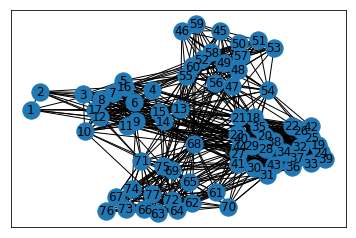

In [65]:
def island_graph(df_,w):
  return(nx.from_pandas_edgelist(df = (df_[df_['weight'] >= w]), source='source', target='target', edge_attr='weight', create_using=None))
nx.draw_networkx(G = island_graph(df_ = df_new, w = 2))